# NYC taxicab Data Analysis

### Data: New York City Taxi Trip Data (2013)
### Source: NYC Taxi & Limousine Commission

### Project by: Vinay Kumar Ranganath Babu
### Technology used: Python
### Libraries used: numpy, pandas, matplotlib, statsmodels, pygeocoder
### Visualizations: bar plot, histogram, line plot, mosaic plot

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

In [2]:
# Importing the data into pandas dataframe
trips = pd.read_csv("trip_data.csv")
fares = pd.read_csv("fare_data.csv")

In [3]:
# Visualizing different trips attributes 
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13059961 entries, 0 to 13059960
Data columns (total 14 columns):
medallion             object
hack_license          object
vendor_id             object
rate_code             int64
store_and_fwd_flag    object
pickup_datetime       object
dropoff_datetime      object
passenger_count       int64
trip_time_in_secs     int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.4+ GB


In [4]:
# Visualizing different fares attributes 
fares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13059961 entries, 0 to 13059960
Data columns (total 11 columns):
medallion           object
 hack_license       object
 vendor_id          object
 pickup_datetime    object
 payment_type       object
 fare_amount        float64
 surcharge          float64
 mta_tax            float64
 tip_amount         float64
 tolls_amount       float64
 total_amount       float64
dtypes: float64(6), object(5)
memory usage: 1.1+ GB


# Data Cleaning

In [5]:
# Renaming fares column names by trimming away the white spaces
cols = fares.columns.str.strip().tolist()
old_names = fares.columns
fares.rename(columns=dict(zip(old_names,cols)),inplace=True)

In [6]:
# Visualizing different trips attributes 
fares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13059961 entries, 0 to 13059960
Data columns (total 11 columns):
medallion          object
hack_license       object
vendor_id          object
pickup_datetime    object
payment_type       object
fare_amount        float64
surcharge          float64
mta_tax            float64
tip_amount         float64
tolls_amount       float64
total_amount       float64
dtypes: float64(6), object(5)
memory usage: 1.1+ GB


Now all the white spaces are trimmed and the dataframe is ready for usage.
We can now merge both 'trips' and 'fares' dataframes on 4 attributes ('medallion','hack_license','vendor_id','pickup_datetime')

In [7]:
# Merging both the dataframes into one by inner join
final_data = trips.merge(fares,on=['medallion','hack_license','vendor_id','pickup_datetime'],how='left')

In [8]:
# Visualizing final_data dataframe attributes
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13060361 entries, 0 to 13060360
Data columns (total 21 columns):
medallion             object
hack_license          object
vendor_id             object
rate_code             int64
store_and_fwd_flag    object
pickup_datetime       object
dropoff_datetime      object
passenger_count       int64
trip_time_in_secs     int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
payment_type          object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
dtypes: float64(11), int64(3), object(7)
memory usage: 2.1+ GB


In [9]:
# First five rows of final_data
final_data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,001DFAC01BC0A32F48C3769DD1414778,5A677E8D42137D0006944AF0E4D4488C,CMT,1,N,2013-01-19 12:37:55,2013-01-19 12:51:26,3,810,3.1,...,40.736645,-73.957756,40.768227,CRD,12.5,0.0,0.5,1.50,0.0,14.50
1,001DFAC01BC0A32F48C3769DD1414778,EB99F192B7EA48BE077EE152BB630A4E,CMT,1,N,2013-01-18 15:16:11,2013-01-18 15:32:51,1,1000,2.6,...,40.762726,-73.976303,40.788666,CRD,13.0,0.0,0.5,2.70,0.0,16.20
2,001DFAC01BC0A32F48C3769DD1414778,EB99F192B7EA48BE077EE152BB630A4E,CMT,5,N,2013-01-18 15:34:56,2013-01-18 16:21:18,1,2782,18.3,...,40.791367,-74.184647,40.692551,CRD,69.0,0.0,0.0,13.80,0.0,82.80
3,001DFAC01BC0A32F48C3769DD1414778,AAB8A9FBE9CF2DDCB146CC6EFEDD772F,CMT,5,N,2013-01-18 23:06:21,2013-01-18 23:26:43,1,1221,5.1,...,40.738934,-74.035683,40.716774,CRD,55.0,0.0,0.0,11.00,0.0,66.00
4,001DFAC01BC0A32F48C3769DD1414778,AAB8A9FBE9CF2DDCB146CC6EFEDD772F,CMT,1,N,2013-01-18 22:18:20,2013-01-18 22:32:08,1,828,3.4,...,40.771252,-73.955116,40.741486,CRD,13.5,0.5,0.5,5.08,0.0,19.58


In [10]:
# Total number of rows and columns of final_data dataframe
final_data.shape

(13060361, 21)

In [11]:
# Releasing the memory by deleting 'trips' and 'fares' dataframes
dfs = [fares,trips]
del dfs

# Feature Engineering

In [12]:
# Converting pickup_datetime into datetime type
final_data['pickup_datetime'] = pd.to_datetime(final_data['pickup_datetime'])

In [13]:
# Creating features by extracting individual date, month, week number, weekday name, hour number from final_data dataframe
final_data['Date'] = final_data['pickup_datetime'].dt.date
final_data['Month'] = final_data['pickup_datetime'].dt.month
final_data['Week'] = final_data['pickup_datetime'].dt.week
final_data['Day_Of_The_Week'] = final_data['pickup_datetime'].dt.weekday_name
final_data['Hour'] = final_data['pickup_datetime'].dt.hour

# Create a new feature by converting trip time into minutes
final_data['trip_time_in_mins'] = final_data['trip_time_in_secs'] / 60

In [14]:
# A function which maps a day into weekday/weekend
def weekday_weekend(day):
    if day in ['Monday','Tuesday','Wednesday','Thursday','Friday']:
        return 'Weekday'
    else: 
        return 'Weekend'

In [15]:
# A function which maps time of a day
def time_in_a_day(hour):
    if hour >= 5 and hour <= 8:
        return 'Early Morning'
    if hour >= 11 and hour <= 12:
        return 'Late Morning'
    if hour >= 13 and hour <= 15:
        return 'Early Afternoon'
    if hour >= 16 and hour <= 17:
        return 'Late Afternoon'
    if hour >= 18 and hour <= 19:
        return 'Evening'
    if hour in [20,21,22,23,24,1,2,3,4]:
        return 'Night'

In [16]:
# A function which maps the season name
def season(month):
    if month in [3,4,5]:
        return 'Spring'
    if month in [6,7,8]:
        return 'Summer'
    if month in [9,10,11]:
        return 'Fall'
    if month in [12,1,2]:
        return 'Winter'

In [17]:
# A function which maps the season number (Later used for visualizations)
def season_num(season):
    if season == 'Spring':
        return 1
    if season == 'Summer':
        return 2
    if season == 'Fall':
        return 3
    if season == 'Winter':
        return 4

In [18]:
# A function which maps the day in a week to number (Later used for visualizations)
def day_num(day):
    if day == 'Monday':
        return 1
    if day == 'Tuesday':
        return 2
    if day == 'Wednesday':
        return 3
    if day == 'Thursday':
        return 4
    if day == 'Friday':
        return 5
    if day == 'Saturday':
        return 6
    if day == 'Sunday':
        return 7

In [19]:
# A function which maps the time of a day to number (Later used for visualizations)
def time_in_a_day_num(time):
    if time == 'Early Morning':
        return 1
    if time == 'Late Morning':
        return 2
    if time == 'Early Afternoon':
        return 3
    if time == 'Late Afternoon':
        return 4
    if time == 'Evening':
        return 5
    if time == 'Night':
        return 6

In [20]:
# Map the above created functions and create new features such as 
# 'Weekday?','time_in_a_day','Season','day_num','season_num','time_in_a_day_num'

final_data['Weekday?'] = final_data['Day_Of_The_Week'].apply(weekday_weekend)
final_data['time_in_a_day'] = final_data['Hour'].apply(time_in_a_day)
final_data['Season'] = final_data['Month'].apply(season)
final_data['day_num'] = final_data['Day_Of_The_Week'].apply(day_num)
final_data['season_num'] = final_data['Season'].apply(season_num)
final_data['time_in_a_day_num'] = final_data['time_in_a_day'].apply(time_in_a_day_num)

In [21]:
# Create a new feature 'Holiday?' to check if the day was a public holiday
from pandas.tseries.holiday import USFederalHolidayCalendar as calender

cal = calender()
holidays = cal.holidays(start='2013-01-01',end='2013-12-31')
final_data['Holiday?'] = final_data['pickup_datetime'].isin(holidays)

In [22]:
# Check if all the features were created correctly
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13060361 entries, 0 to 13060360
Data columns (total 34 columns):
medallion             object
hack_license          object
vendor_id             object
rate_code             int64
store_and_fwd_flag    object
pickup_datetime       datetime64[ns]
dropoff_datetime      object
passenger_count       int64
trip_time_in_secs     int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
payment_type          object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
Date                  object
Month                 int64
Week                  int64
Day_Of_The_Week       object
Hour                  int64
trip_time_in_mins     float64
Weekday?              object
time_in_a_day         object
Season                object
d

# INSIGHTS

## How many medallions have the right to run a yellow taxi cab?

In [23]:
print(len(final_data['medallion'].unique()))

1000


## On an average, how many miles did a taxi travel per year?

In [24]:
print(final_data['trip_distance'].sum() / len(final_data['medallion'].unique()))

54609.26479001245


## Average trips per day? How many trips per annum?

In [25]:
print("Average trips per day:",final_data.shape[0] / 365)
print("Total trips in 2013:",final_data.shape[0])

Average trips per day: 35781.81095890411
Total trips in 2013: 13060361


## Average trip distance (in miles)

In [26]:
print(final_data['trip_distance'].sum() / final_data.shape[0])

4.181298265033597


## Histogram of trip distances (in miles)

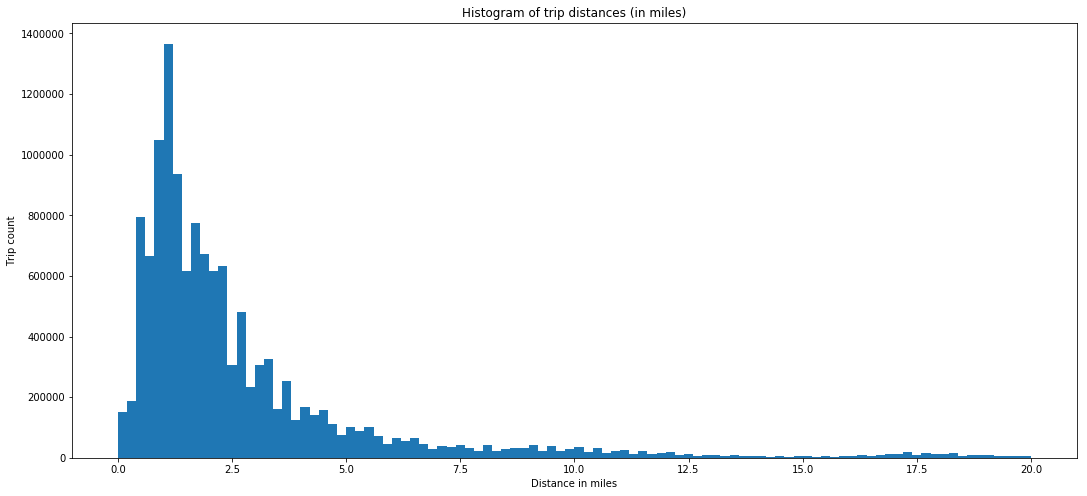

In [27]:
plt.figure(figsize=(18,8))
plt.hist(final_data['trip_distance'],range=(final_data['trip_distance'].min(),20),bins=100)
plt.title("Histogram of trip distances (in miles)")
plt.xlabel("Distance in miles")
plt.ylabel("Trip count")
plt.show()

### What number of trips contribute to 99%

In [28]:
print((len(final_data[final_data['trip_distance'] < 18.1]) / (final_data.shape[0])) * 100)

99.02007302860923


99% of all trips are less than 18.1 miles

## Average trip time (in minutes)

In [29]:
print(((final_data['trip_time_in_secs'].sum())/60) / final_data.shape[0])

13.870432897426547


## Histogram of trip timings (in minutes)

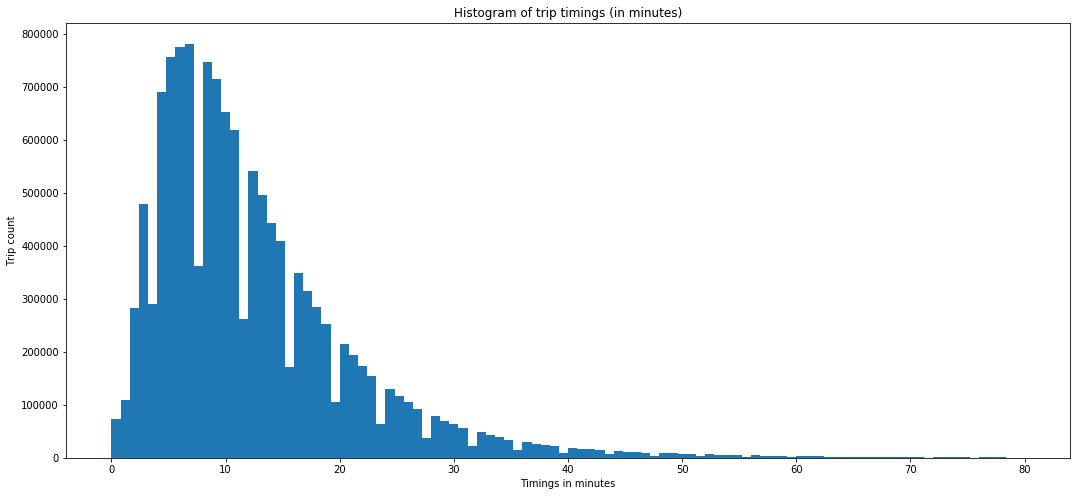

In [30]:
plt.figure(figsize=(18,8))
plt.hist(final_data['trip_time_in_mins'],range=(0,80),bins=100)
plt.title("Histogram of trip timings (in minutes)")
plt.xlabel("Timings in minutes")
plt.ylabel("Trip count")
plt.show()

### What number of trip timings contribute to 99%

In [31]:
print((len(final_data[final_data['trip_time_in_mins'] < 47]) / (final_data.shape[0])) * 100)

99.01582352892083


99% of all trips are less than 47 minutes

## How many drivers drove in 2013?

In [32]:
print(len(final_data['hack_license'].unique()))

15999


## What is a typical driver shift? (in hours)

In [33]:
print(((final_data['trip_time_in_secs'].sum() / 3600) / len(final_data['hack_license'].unique())))

188.71269127931606


## Average passengers travelling per day? How many in total in 2013?

In [34]:
print("Average number of passengers travelling per day:", final_data['passenger_count'].sum() / 365)
print("Total number of passengers travelled in 2013:", final_data['passenger_count'].sum())

Average number of passengers travelling per day: 60708.84383561644
Total number of passengers travelled in 2013: 22158728


# Deep-Dive into TRIPS related insights

## How did trips vary according to months in 2013?

In [35]:
print(final_data['Month'].value_counts().sort_index())

1     1115412
2     1055312
3     1191903
4     1143606
5     1148317
6     1088253
7     1044796
8      952281
9     1061582
10    1133668
11    1079688
12    1045543
Name: Month, dtype: int64


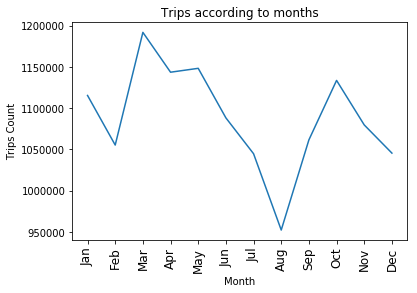

In [36]:
X = np.arange(12)
X_ticks_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Y = list(final_data['Month'].value_counts().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Trips according to months")
plt.xlabel("Month")
plt.ylabel("Trips Count")
plt.show()

In [37]:
print((len(final_data[final_data['Month'].isin([1,2,3,4,5,6])]) / final_data.shape[0]) * 100)

51.62799864414161


51.6% of the trips happened in the first 6 months.

## How did trips vary according to day of the week?

In [38]:
print(final_data['Day_Of_The_Week'].value_counts())

Friday       1985799
Saturday     1974846
Thursday     1924818
Wednesday    1883133
Tuesday      1865565
Sunday       1736943
Monday       1689257
Name: Day_Of_The_Week, dtype: int64


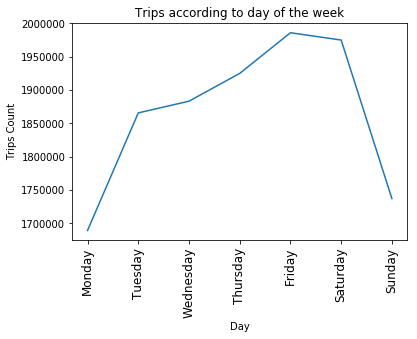

In [39]:
X = np.arange(7)
X_ticks_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Y = list(final_data['day_num'].value_counts().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Trips according to day of the week")
plt.xlabel("Day")
plt.ylabel("Trips Count")
plt.show()

## Most number of trips on a particular day

In [40]:
print(final_data['Date'].value_counts()[:10])

2013-02-23    44413
2013-03-02    43967
2013-03-16    43765
2013-04-12    43466
2013-04-20    43083
2013-02-02    42924
2013-03-15    42631
2013-01-26    42445
2013-02-01    42344
2013-03-09    42218
Name: Date, dtype: int64


## How did trips vary according to day of the season?

In [41]:
print(final_data['Season'].value_counts())

Spring    3483826
Fall      3274938
Winter    3216267
Summer    3085330
Name: Season, dtype: int64


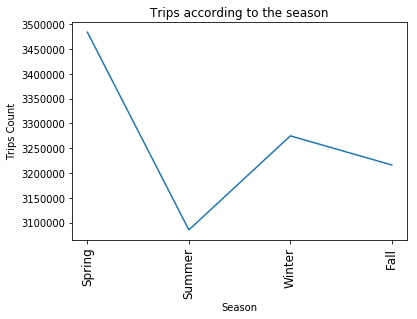

In [42]:
X = np.arange(4)
X_ticks_labels = ['Spring','Summer','Winter','Fall']
Y = list(final_data['season_num'].value_counts().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Trips according to the season")
plt.xlabel("Season")
plt.ylabel("Trips Count")
plt.show()

## How did trips vary according to time of the day?

In [43]:
print(final_data['time_in_a_day'].value_counts())

Night              3957374
Early Afternoon    1920723
Evening            1596639
Early Morning      1457183
Late Morning       1250450
Late Afternoon     1157065
Name: time_in_a_day, dtype: int64


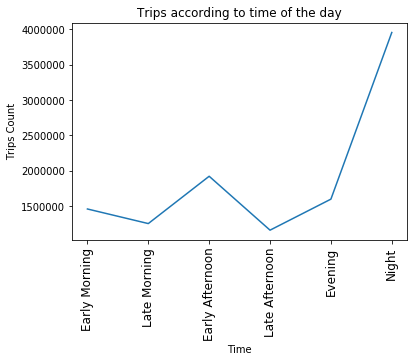

In [44]:
X = np.arange(6)
X_ticks_labels = ['Early Morning','Late Morning','Early Afternoon','Late Afternoon','Evening','Night']
Y = list(final_data['time_in_a_day_num'].value_counts().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Trips according to time of the day")
plt.xlabel("Time")
plt.ylabel("Trips Count")
plt.show()

In [45]:
print((len(final_data[final_data['time_in_a_day'] == 'Night']) / final_data.shape[0]) * 100)

30.30064789173898


30% of the trips happened during night.

## Trips trend by week

In [46]:
print(final_data['Week'].value_counts())

11    277350
7     272761
9     272586
15    271128
16    270732
10    269946
18    266939
8     266853
12    266831
5     266510
20    266191
14    265729
19    265172
4     264980
17    264972
1     262786
3     261264
44    260273
43    259089
45    259065
47    258917
37    258910
23    258424
50    257561
38    257384
46    256519
24    256357
49    256229
40    255496
41    255305
42    255013
13    254656
29    252001
26    249940
25    248944
21    248534
39    248333
51    248262
22    247114
2     245894
6     245426
28    245275
30    243012
36    236260
34    232627
33    230383
35    226466
48    215839
32    214774
27    205451
52    187961
31    175937
Name: Week, dtype: int64


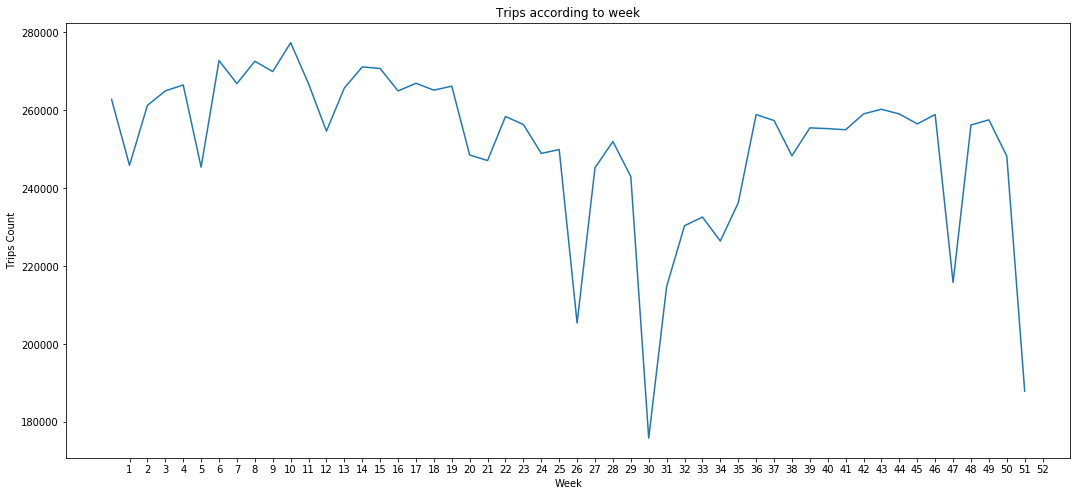

In [47]:
X_ticks_labels = list(final_data['Week'].value_counts().sort_index().index)
X = np.arange(len(X_ticks_labels))
Y = list(final_data['Week'].value_counts().sort_index().values)

plt.figure(figsize=(18,8))
plt.plot(X,Y)
plt.xticks(X_ticks_labels)
plt.title("Trips according to week")
plt.xlabel("Week")
plt.ylabel("Trips Count")
plt.show()

## Trips on weekdays and weekend?

In [48]:
print(final_data['Weekday?'].value_counts())

Weekday    9348572
Weekend    3711789
Name: Weekday?, dtype: int64


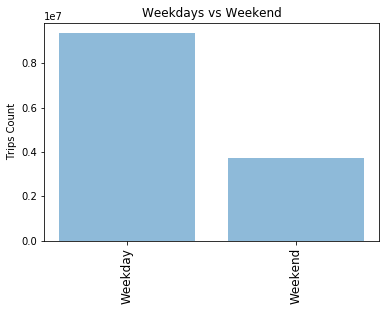

In [49]:
X = np.arange(2)
X_ticks_labels = final_data['Weekday?'].value_counts().index
Y = list(final_data['Weekday?'].value_counts().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.bar(X,Y,align='center',alpha=0.5)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Weekdays vs Weekend")
plt.ylabel("Trips Count")
plt.show()

In [50]:
print((len(final_data[final_data['Weekday?'] == 'Weekday']) / final_data.shape[0]) * 100)

71.57973657849121


71.5% of the trips happened on weekdays.

## Trips on Holidays

In [51]:
print(final_data['Holiday?'].value_counts())

False    13060258
True          103
Name: Holiday?, dtype: int64


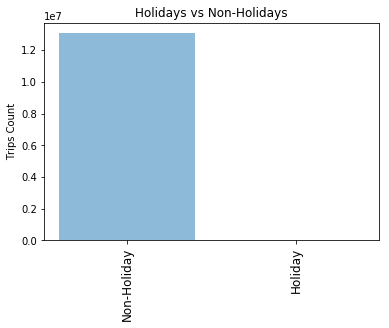

In [52]:
X = np.arange(2)
X_ticks_labels = ['Non-Holiday','Holiday']
Y = list(final_data['Holiday?'].value_counts().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.bar(X,Y,align='center',alpha=0.5)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Holidays vs Non-Holidays")
plt.ylabel("Trips Count")
plt.show()

In [53]:
print((len(final_data[final_data['Holiday?'] == True]) / final_data.shape[0]) * 100)

0.0007886458881190191


Just 0.0007% of the trips happened during public holidays.

# Trip trends by location

In [54]:
# Create new features by concatenating pickup, dropoff latitudes and longitudes
final_data['pickup_location_coord'] = final_data['pickup_latitude'].astype(str) + "," + final_data['pickup_longitude'].astype(str)
final_data['dropoff_location_coord'] = final_data['dropoff_latitude'].astype(str) + "," + final_data['dropoff_longitude'].astype(str)

In [55]:
# Import Geocoder from pygeocoder package
from pygeocoder import Geocoder

# Create a function to reverse code and fetch the location
def address(lat,lon):
    return Geocoder.reverse_geocode(lat,lon)

## Top 2 pickup locations

In [56]:
top_2_pickups = list(final_data['pickup_location_coord'].value_counts().index[1:3])

from geopy.geocoders import Nominatim
geolocator = Nominatim()

print("The top two pick up locations were:")
for i in top_2_pickups:
    print(geolocator.reverse(i))

The top two pick up locations were:
Copernicus International School, 11-43, 47th Avenue, LIC, Queens County, NYC, New York, 11101, United States of America
Lincoln Tunnel access, Lincoln Harbor, Weehawken, Hudson County, New Jersey, 07087, United States of America


## Top 2 dropoff locations

In [57]:
top_2_dropoffs = list(final_data['dropoff_location_coord'].value_counts().index[1:3])

print("The top two dropoff locations were:")
for i in top_2_dropoffs:
    print(geolocator.reverse(i))

The top two dropoff locations were:
Copernicus International School, 11-43, 47th Avenue, LIC, Queens County, NYC, New York, 11101, United States of America
Lincoln Tunnel access, Lincoln Harbor, Weehawken, Hudson County, New Jersey, 07087, United States of America


# Top pickup counties

In [58]:
top_10_pickups = list(final_data['pickup_location_coord'].value_counts().index[0:11])

counties = []
for i in top_10_pickups:
    if i == '0.0,0.0' or i == 'nan,nan':
        pass
    else:    
        results = str(geolocator.reverse(i))
        b = results.split(',')
        for i in b:
            if 'County' in i:
                counties.append(i)

print(set(counties))        

{' New York County', ' Hudson County', ' Nassau County', ' Queens County'}


Hence Queens county had the maximum pickup followed by New York county.

# Top dropoff counties

In [59]:
top_10_dropoffs = list(final_data['dropoff_location_coord'].value_counts().index[0:12])

dropoff_counties = []
for i in top_10_dropoffs:
    if i == '0.0,0.0' or i == 'nan,nan':
        pass
    else:    
        results = str(geolocator.reverse(i))
        b = results.split(',')
        for i in b:
            if 'County' in i:
                dropoff_counties.append(i)

print(set(dropoff_counties))     

{' New York County', ' Hudson County', ' Nassau County', ' Queens County'}


Hence Queens county had the maximum dropoffs followed by Nassau county.

# Deep-Dive into Passengers related insights

In [60]:
print(final_data['passenger_count'].value_counts())

1    9229324
2    1781143
5     739599
3     554228
6     491715
4     264029
0        319
9          2
8          1
7          1
Name: passenger_count, dtype: int64


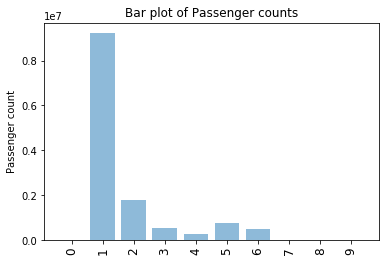

In [61]:
X = np.arange(len(final_data['passenger_count'].value_counts().index))
X_ticks_labels = final_data['passenger_count'].value_counts().sort_index().index
Y = list(final_data['passenger_count'].value_counts().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.bar(X,Y,align='center',alpha=0.5)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Bar plot of Passenger counts")
plt.ylabel("Passenger count")
plt.show()

In [62]:
print((len(final_data[final_data['passenger_count'] == 1]) / final_data.shape[0]) * 100)

70.66668371571046


70% of the trips had only one passenger.

## Which month had maximum number of passengers?

In [63]:
print(final_data.groupby(['Month'])['passenger_count'].sum())

Month
1     1896937
2     1783778
3     2027055
4     1948682
5     1976016
6     1875239
7     1787268
8     1599338
9     1775381
10    1897493
11    1814688
12    1776853
Name: passenger_count, dtype: int64


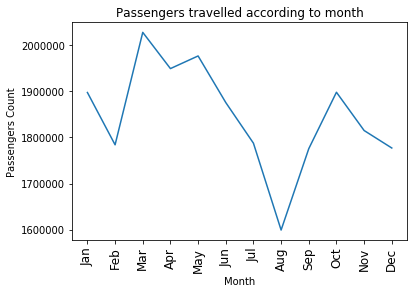

In [64]:
X = np.arange(12)
X_ticks_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Y = list(final_data.groupby(['Month'])['passenger_count'].sum().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Passengers travelled according to month")
plt.ylabel("Passengers Count")
plt.xlabel("Month")
plt.show()

## Which day of the week had maximum number of passengers?

In [65]:
print(final_data.groupby(['Day_Of_The_Week'])['passenger_count'].sum())

Day_Of_The_Week
Friday       3374898
Monday       2796712
Saturday     3489170
Sunday       3048698
Thursday     3221699
Tuesday      3107703
Wednesday    3119848
Name: passenger_count, dtype: int64


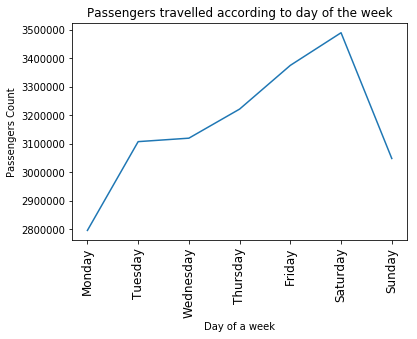

In [66]:
X = np.arange(7)
X_ticks_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Y = list(final_data.groupby(['day_num'])['passenger_count'].sum().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Passengers travelled according to day of the week")
plt.xlabel("Day of a week")
plt.ylabel("Passengers Count")
plt.show()

## Which season had maximum number of passengers?

In [67]:
print(final_data.groupby(['Season'])['passenger_count'].sum())

Season
Fall      5487562
Spring    5951753
Summer    5261845
Winter    5457568
Name: passenger_count, dtype: int64


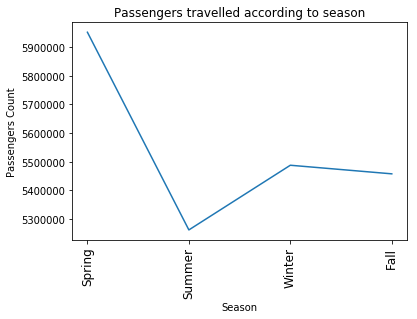

In [68]:
X = np.arange(4)
X_ticks_labels = ['Spring','Summer','Winter','Fall']
Y = list(final_data.groupby(['season_num'])['passenger_count'].sum().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Passengers travelled according to season")
plt.xlabel("Season")
plt.ylabel("Passengers Count")
plt.show()

## What time in a day had maximum number of passengers?

In [69]:
print(final_data.groupby(['time_in_a_day'])['passenger_count'].sum())

time_in_a_day
Early Afternoon    3258701
Early Morning      2286982
Evening            2743527
Late Afternoon     1978619
Late Morning       2090592
Night              6919583
Name: passenger_count, dtype: int64


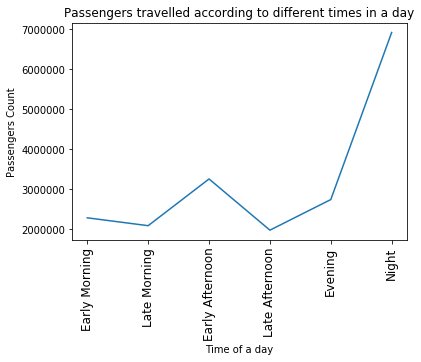

In [70]:
X = np.arange(6)
X_ticks_labels = ['Early Morning','Late Morning','Early Afternoon','Late Afternoon','Evening','Night']
Y = list(final_data.groupby(['time_in_a_day_num'])['passenger_count'].sum().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Passengers travelled according to different times in a day")
plt.xlabel("Time of a day")
plt.ylabel("Passengers Count")
plt.show()

In [71]:
print((len(final_data[final_data['time_in_a_day'] == 'Night']) / final_data.shape[0]) * 100)

30.30064789173898


In [72]:
print((len(final_data[final_data['time_in_a_day'] == 'Late Afternoon']) / final_data.shape[0]) * 100)

8.859364607149834


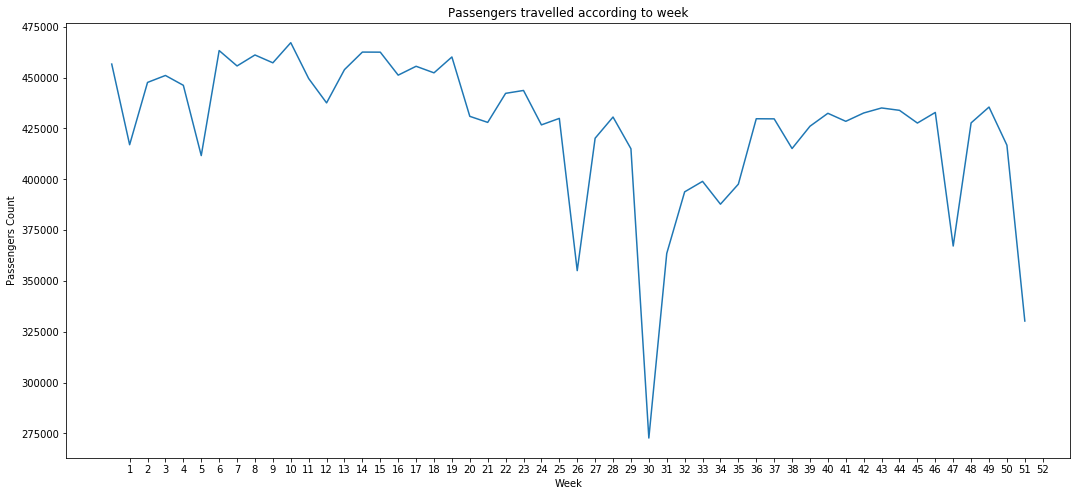

In [73]:
X_ticks_labels = list(final_data['Week'].value_counts().sort_index().index)
X = np.arange(len(X_ticks_labels))
Y = list(final_data.groupby(['Week'])['passenger_count'].sum().sort_index().values)

plt.figure(figsize=(18,8))
plt.plot(X,Y)
plt.xticks(X_ticks_labels)
plt.title("Passengers travelled according to week")
plt.xlabel("Week")
plt.ylabel("Passengers Count")
plt.show()

# Deep-Dive into FARES related insights

## On an average, what is the cost of a trip?

In [74]:
print((final_data['total_amount'].sum() - final_data['tip_amount'].sum()) / final_data.shape[0])

13.322773950970156


## On an average, what is the total income of a driver in an year?

In [75]:
print(final_data['total_amount'].sum() / len(final_data['hack_license'].unique()))

11980.533506533026


## On an average, how much do a single medallion earn per year?

In [76]:
print((final_data['total_amount'].sum() - final_data['tip_amount'].sum()) / len(final_data['medallion'].unique()))

174000.23732106652


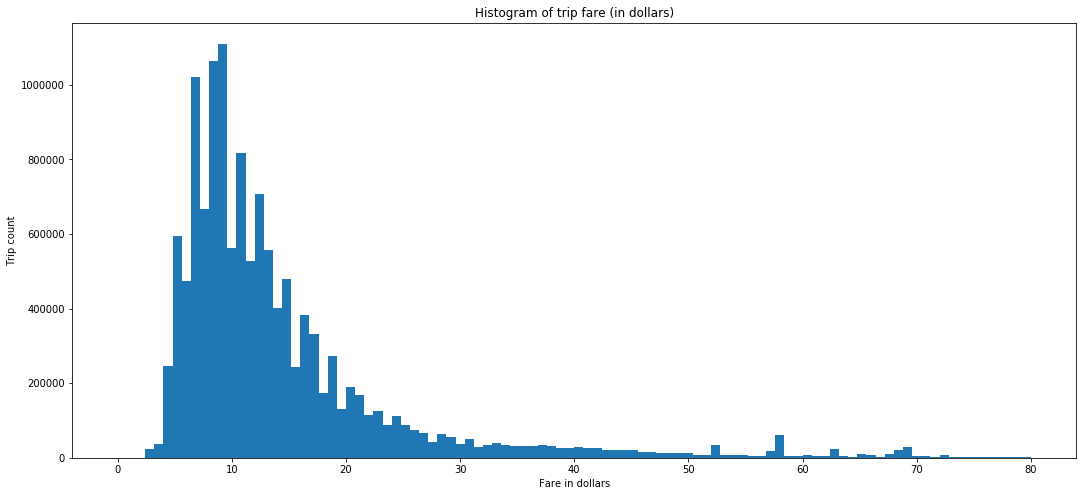

In [77]:
plt.figure(figsize=(18,8))
plt.hist(final_data['total_amount'],range=(0,80),bins=100)
plt.title("Histogram of trip fare (in dollars)")
plt.xlabel("Fare in dollars")
plt.ylabel("Trip count")
plt.show()

## What number of trip fares contribute to 99%?

In [78]:
print((len(final_data[final_data['total_amount'] < 66]) / (final_data.shape[0])) * 100)

99.03273730335631


99% of all trips are less than 66 dollars.

In [79]:
print(final_data['payment_type'].value_counts())

CRD    7018834
CSH    5977520
NOC      39219
UNK      14295
DIS      10493
Name: payment_type, dtype: int64


(<matplotlib.figure.Figure at 0x25cc6a8a240>,
 OrderedDict([(('CRD',), (0.0, 0.0, 0.5268774579754395, 1.0)),
              (('CSH',), (0.53177941875975321, 0.0, 0.44870993424226141, 1.0)),
              (('DIS',),
               (0.98539131378632827, 0.0, 0.00078767002703529401, 1.0)),
              (('NOC',),
               (0.99108094459767737, 0.0, 0.0029440227571045198, 1.0)),
              (('UNK',),
               (0.99892692813909556, 0.0, 0.0010730718609043919, 1.0))]))

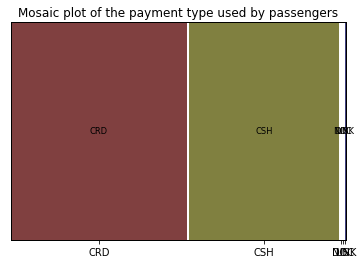

In [80]:
mosaic(final_data,['payment_type'],title='Mosaic plot of the payment type used by passengers')

## On an average, what is the tip amount offered by a passenger?

In [81]:
print(final_data['tip_amount'].sum() / len(final_data['payment_type'] == 'CRD'))

1.3534325927097541


## What percentage of people who pay through credit card offer a tip amount?

In [82]:
print(len(final_data['tip_amount'] > 0) / len(final_data['payment_type'] == 'CRD') * 100)

100.0


100% of the customers paying through credit card offer a tip amount

## How did fares vary according to month?

In [83]:
print(final_data.groupby(['Month'])['total_amount'].sum())

Month
1     1.543906e+07
2     1.471234e+07
3     1.701870e+07
4     1.666958e+07
5     1.716258e+07
6     1.626147e+07
7     1.533986e+07
8     1.424289e+07
9     1.604695e+07
10    1.707455e+07
11    1.600108e+07
12    1.570749e+07
Name: total_amount, dtype: float64


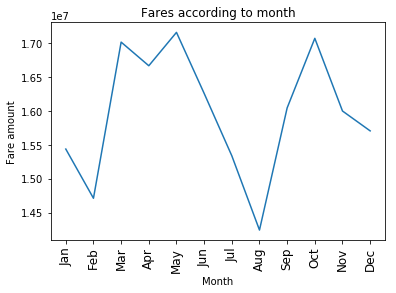

In [84]:
X = np.arange(12)
X_ticks_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Y = list(final_data.groupby(['Month'])['total_amount'].sum().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Fares according to month")
plt.xlabel("Month")
plt.ylabel("Fare amount")
plt.show()

## How did fares vary according to day of the week?

In [85]:
print(final_data.groupby(['Day_Of_The_Week'])['total_amount'].sum())

Day_Of_The_Week
Friday       2.948582e+07
Monday       2.498403e+07
Saturday     2.761201e+07
Sunday       2.568925e+07
Thursday     2.886386e+07
Tuesday      2.719923e+07
Wednesday    2.784236e+07
Name: total_amount, dtype: float64


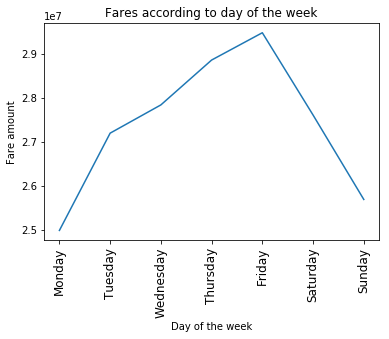

In [86]:
X = np.arange(7)
X_ticks_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Y = list(final_data.groupby(['day_num'])['total_amount'].sum().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Fares according to day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Fare amount")
plt.show()

## How did fares vary according to the season?

In [87]:
print(final_data.groupby(['Season'])['total_amount'].sum())

Season
Fall      4.912258e+07
Spring    5.085087e+07
Summer    4.584421e+07
Winter    4.585890e+07
Name: total_amount, dtype: float64


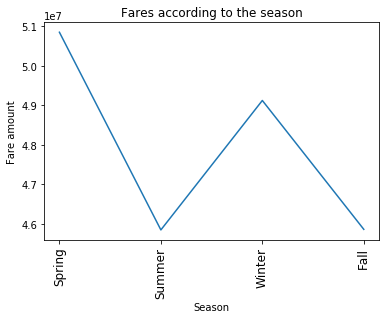

In [88]:
X = np.arange(4)
X_ticks_labels = ['Spring','Summer','Winter','Fall']
Y = list(final_data.groupby(['season_num'])['total_amount'].sum().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Fares according to the season")
plt.xlabel("Season")
plt.ylabel("Fare amount")
plt.show()

## How did fares vary according to time in a day?

In [89]:
print(final_data.groupby(['time_in_a_day'])['total_amount'].sum())

time_in_a_day
Early Afternoon    2.859783e+07
Early Morning      2.152937e+07
Evening            2.282083e+07
Late Afternoon     1.782142e+07
Late Morning       1.756870e+07
Night              5.873147e+07
Name: total_amount, dtype: float64


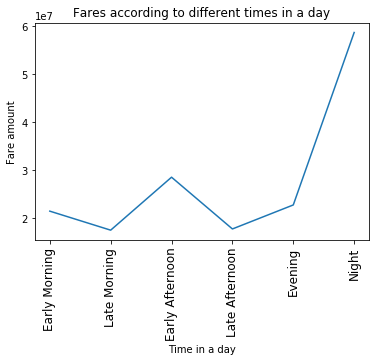

In [90]:
X = np.arange(6)
X_ticks_labels = ['Early Morning','Late Morning','Early Afternoon','Late Afternoon','Evening','Night']
Y = list(final_data.groupby(['time_in_a_day_num'])['total_amount'].sum().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Fares according to different times in a day")
plt.xlabel("Time in a day")
plt.ylabel("Fare amount")
plt.show()

### Analysis on how surcharge varies accordingly with week,time,season,month

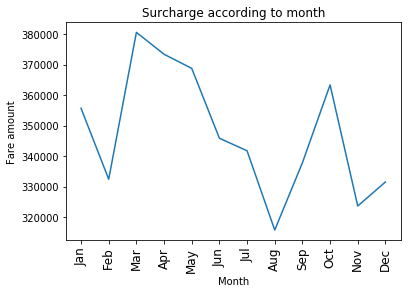

In [91]:
X = np.arange(12)
X_ticks_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Y = list(final_data.groupby(['Month'])['surcharge'].sum().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Surcharge according to month")
plt.xlabel("Month")
plt.ylabel("Fare amount")
plt.show()

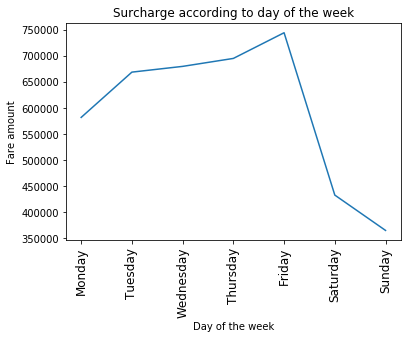

In [92]:
X = np.arange(7)
X_ticks_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Y = list(final_data.groupby(['day_num'])['surcharge'].sum().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Surcharge according to day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Fare amount")
plt.show()

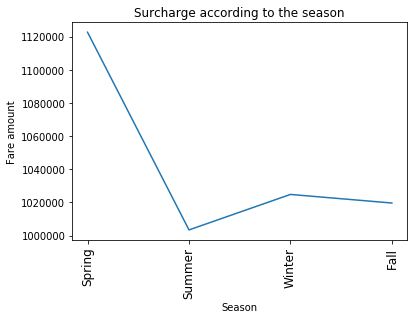

In [93]:
X = np.arange(4)
X_ticks_labels = ['Spring','Summer','Winter','Fall']
Y = list(final_data.groupby(['season_num'])['surcharge'].sum().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Surcharge according to the season")
plt.xlabel("Season")
plt.ylabel("Fare amount")
plt.show()

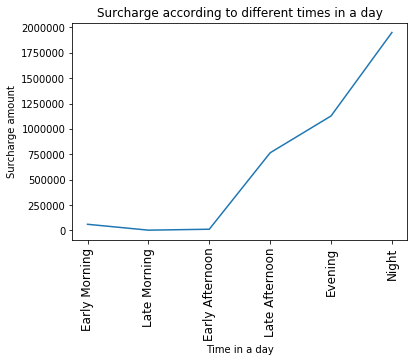

In [94]:
X = np.arange(6)
X_ticks_labels = ['Early Morning','Late Morning','Early Afternoon','Late Afternoon','Evening','Night']
Y = list(final_data.groupby(['time_in_a_day_num'])['surcharge'].sum().sort_index().values)

fig, ax = plt.subplots(1,1)
ax.plot(X,Y)
ax.set_xticks(X)
ax.set_xticklabels(X_ticks_labels,rotation='vertical',fontsize=12)
plt.title("Surcharge according to different times in a day")
plt.xlabel("Time in a day")
plt.ylabel("Surcharge amount")
plt.show()

### Analysis based on the 'Tip Amount'

In [95]:
print(final_data[final_data['payment_type'] == 'CRD']['tip_amount'].value_counts())

1.00     1154532
2.00      638845
1.50      509222
3.00      221319
0.00      214465
2.50      181378
1.80      163455
1.60      152633
1.40      151352
1.20      145465
1.70      144923
1.30      144883
2.10      139474
1.90      135657
1.10      118908
2.20      113187
2.40      105618
2.30      100927
4.00       85485
5.00       84374
2.70       83822
2.60       81497
2.80       67967
3.50       67709
0.50       61598
2.90       60060
2.25       53674
3.30       51784
3.10       51258
0.90       49563
          ...   
9.79           1
35.80          1
32.23          1
31.62          1
31.63          1
53.75          1
61.00          1
30.14          1
35.70          1
38.52          1
38.48          1
30.12          1
34.27          1
28.11          1
57.50          1
34.73          1
35.30          1
29.63          1
28.61          1
29.62          1
9.04           1
27.39          1
29.12          1
64.33          1
10.79          1
26.62          1
45.73          1
56.39         

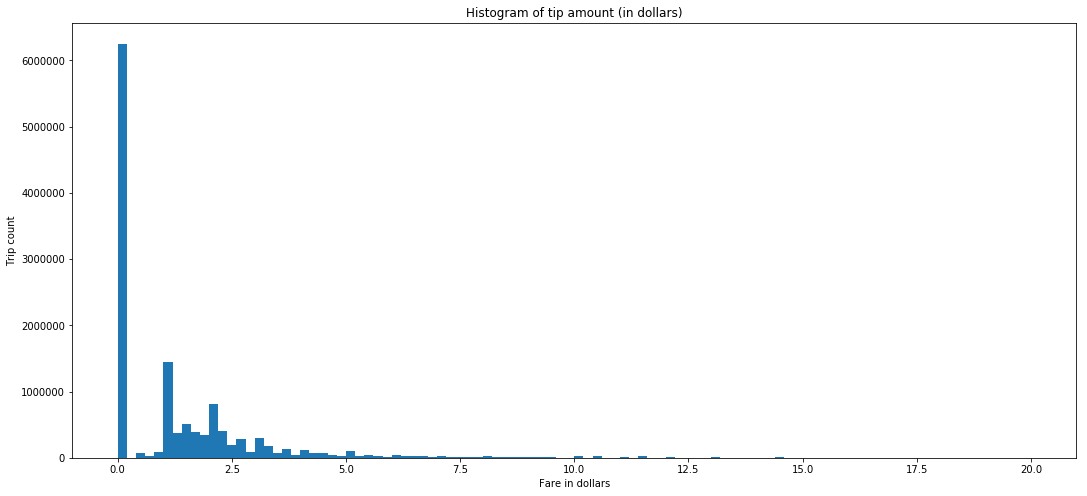

In [96]:
plt.figure(figsize=(18,8))
plt.hist(final_data['tip_amount'],range=(0,20),bins=100)
plt.title("Histogram of tip amount (in dollars)")
plt.xlabel("Fare in dollars")
plt.ylabel("Trip count")
plt.show()

### What percentage of people offer a tip amount less than 5 dollars?

In [97]:
print((len(final_data[final_data['tip_amount'] < 5]) / (len(final_data['payment_type'] == 'CRD')) * 100))

94.72175386269952


Almost 95% of the people who use card to pay tip the driver up to 5 dollars.

(<matplotlib.figure.Figure at 0x25d1d391668>,
 OrderedDict([(('CMT',), (0.0, 0.0, 0.52244272170299755, 1.0)),
              (('VTS',),
               (0.52741784608110698, 0.0, 0.47258215391889308, 1.0))]))

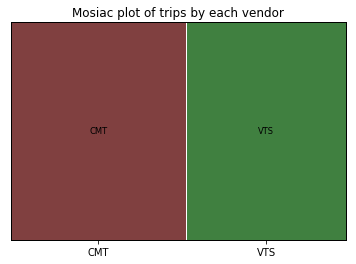

In [98]:
mosaic(final_data, ['vendor_id'],title='Mosiac plot of trips by each vendor')

In [99]:
final_data.groupby(['vendor_id'])['hack_license'].count()

vendor_id
CMT    6857407
VTS    6202954
Name: hack_license, dtype: int64